In [1]:
!pip install git+https://github.com/JohannesBuchner/imagehash.git@master

import sys
sys.path.append("/anaconda/envs/azureml_py38/lib/python3.8/site-packages/")

  Cloning https://github.com/JohannesBuchner/imagehash.git (to revision master) to /tmp/pip-req-build-9bkqk2yw
  Running command git clone -q https://github.com/JohannesBuchner/imagehash.git /tmp/pip-req-build-9bkqk2yw
  Created wheel for ImageHash: filename=ImageHash-4.3.1-py2.py3-none-any.whl size=296689 sha256=87b9bebe57fcfad3895ac84b8bba19dde25bae19679f3b238f8116d88c703e85
  Stored in directory: /tmp/pip-ephem-wheel-cache-m3wwhp9b/wheels/76/36/43/f197e5284adc1f24b8fca15b62c4c02213e0bffa16e4bc0cab
Successfully built ImageHash


In [2]:
import imagehash
import os
import random

import numpy as np

from collections import defaultdict
from PIL import Image


def load_images(path):
    """Load images and labels into lists (order matters for indexing)"""
    filenames = os.listdir(path)
    images = []
    labels = []

    for filename in filenames:
        image = Image.open(path + filename)
        label = filename.split('_')[0]   
        images.append(image)
        labels.append(label)

    return images, labels

def hash_images(images):
    """Compute perceptual hashes for a set of images"""
    return [imagehash.phash(img, highfreq_factor=8) for img in images]

def best_match_classification(target_hash, train_hashes, train_labels):
    """Classify an image by matching it to training image with lowest hamming dist between hashes"""
    hamm_dist = [target_hash - cand_hash for cand_hash in train_hashes]

    # if np.min(hamm_dist) >= 16:
    #     # take majority vote of top n if best match is dissimilar
    #         ranking = list(np.array(hamm_dist).argsort()[:1])
    #         return max(set(ranking), key=ranking.count)
    # else:
    return train_labels[np.argmin(hamm_dist)]

def average_match_classification(target_hash, train_hashes, train_labels):
    """Classify an image by matching it to training image category with lowest average hash distance""" 
    label_set = list(set(train_labels))
    label_scores = []

    for label in label_set:
        indices = [x for x in range(len(train_labels)) if train_labels[x] == label]
        average = np.mean([target_hash - train_hashes[i] for i in indices])
        # average = np.mean([x for x in average if x <= 55])
        label_scores.append(average)
    
    # print(label_scores)
    return label_set[np.argmin(label_scores)]


train_images, train_labels = load_images("./archive/Train/")
test_images, test_labels = load_images("./archive/Test/")

train_hashes = hash_images(train_images)
test_hashes = hash_images(test_images)


In [3]:
print("BEST MATCH SIGNATURE CLASSIFICATION WITH PERCEPTUAL HASHING:")
# estimate best match classification accuracy on train images (should be 100%)
count = 0
for idx, img in enumerate(train_images):
    targ_hash = train_hashes[idx]

    pred_label = best_match_classification(targ_hash, train_hashes, train_labels)
    true_label = train_labels[idx]
    if true_label == pred_label:
        count += 1

print(f"Train Accuracy: {count / len(train_images)}")
    
# estimate best match classification accuracy on test images
count = 0
for idx, img in enumerate(test_images):
    targ_hash = test_hashes[idx]
    
    pred_label = best_match_classification(targ_hash, train_hashes, train_labels)
    true_label = test_labels[idx]
    if true_label == pred_label:
        count += 1

print(f"Test Accuracy: {count / len(test_images)}")
    

BEST MATCH SIGNATURE CLASSIFICATION WITH PERCEPTUAL HASHING:
Train Accuracy: 1.0
Test Accuracy: 0.95


In [4]:
# print("AVERAGE MATCH SIGNATURE CLASSIFICATION WITH PERCEPTUAL HASHING:")
# # estimate best match classification accuracy on train images (should be 100%)
# count = 0
# for idx, img in enumerate(train_images):
#     targ_hash = train_hashes[idx]

#     pred_label = average_match_classification(targ_hash, train_hashes, train_labels)
#     true_label = train_labels[idx]
#     if true_label == pred_label:
#         count += 1

# print(f"Train Accuracy: {count / len(train_images)}")
    
# # estimate best match classification accuracy on test images
# count = 0
# for idx, img in enumerate(test_images):
#     targ_hash = test_hashes[idx]
    
#     pred_label = average_match_classification(targ_hash, train_hashes, train_labels)
#     true_label = test_labels[idx]
#     if true_label == pred_label:
#         count += 1
        
# print(f"Test Accuracy: {count / len(test_images)}")

TEST IMAGE:  personA


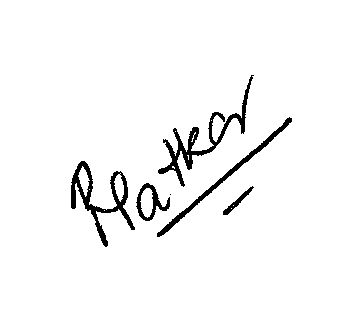

CORRECT MATCH FOR LABELLING:  personA
Hamming Distance:  8


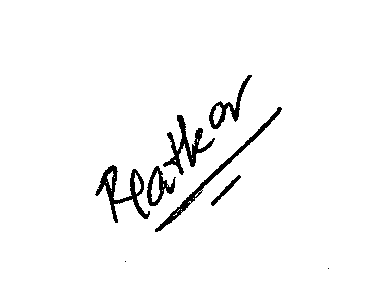

TEST IMAGE:  personA


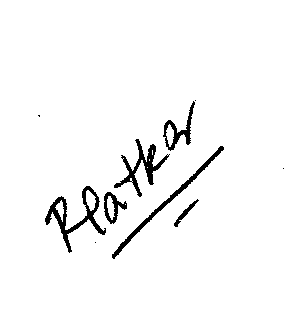

CORRECT MATCH FOR LABELLING:  personA
Hamming Distance:  8


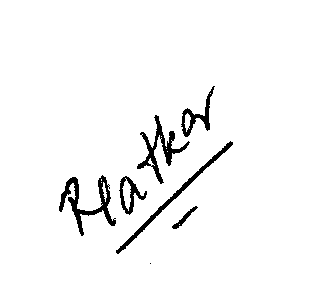

TEST IMAGE:  personA


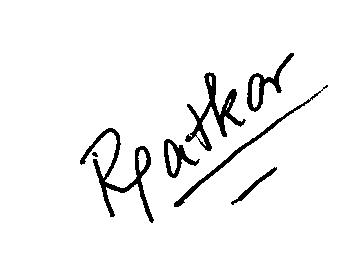

CORRECT MATCH FOR LABELLING:  personA
Hamming Distance:  12


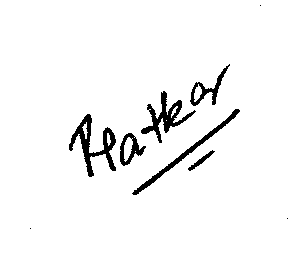

TEST IMAGE:  personA


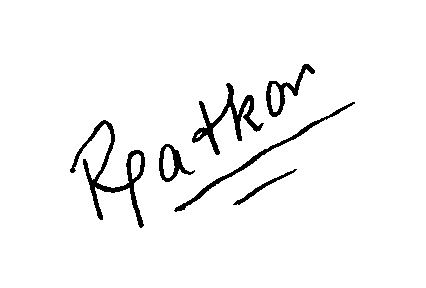

CORRECT MATCH FOR LABELLING:  personA
Hamming Distance:  10


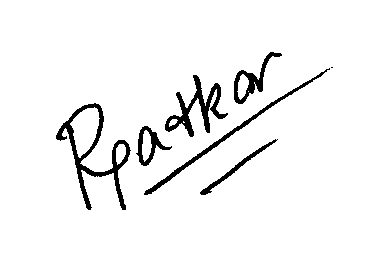

TEST IMAGE:  personA


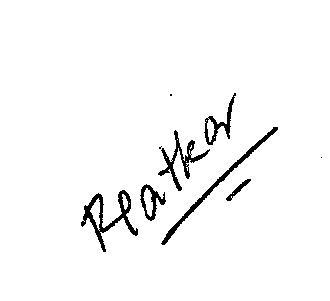

CORRECT MATCH FOR LABELLING:  personA
Hamming Distance:  8


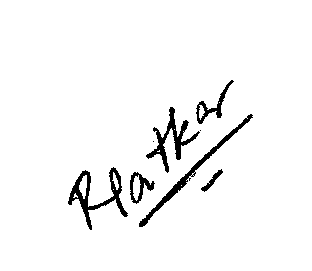

TEST IMAGE:  personA


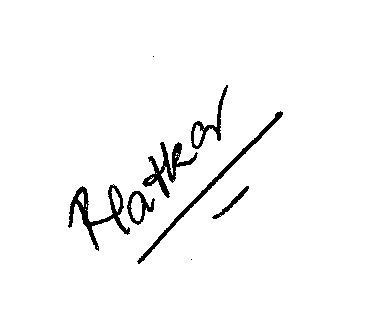

CORRECT MATCH FOR LABELLING:  personA
Hamming Distance:  10


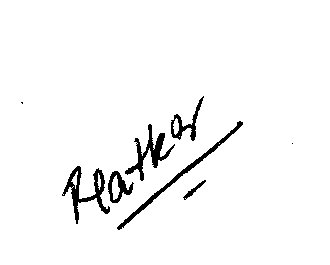

TEST IMAGE:  personA


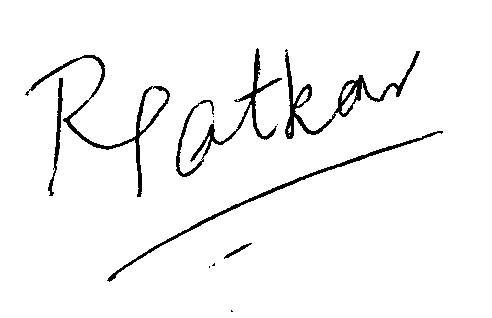

CORRECT MATCH FOR LABELLING:  personA
Hamming Distance:  10


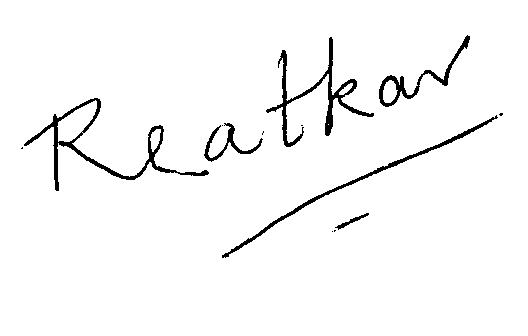

TEST IMAGE:  personA


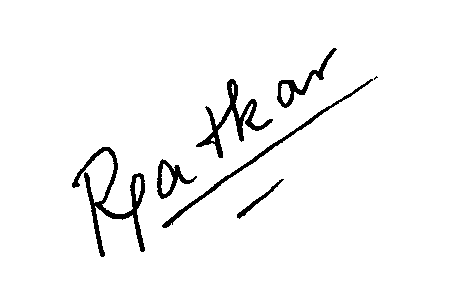

CORRECT MATCH FOR LABELLING:  personA
Hamming Distance:  8


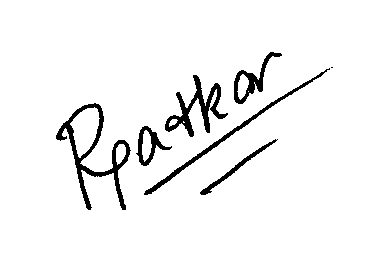

TEST IMAGE:  personB


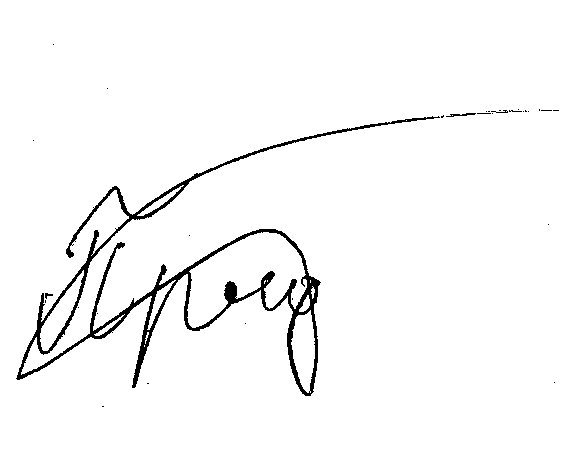

CORRECT MATCH FOR LABELLING:  personB
Hamming Distance:  12


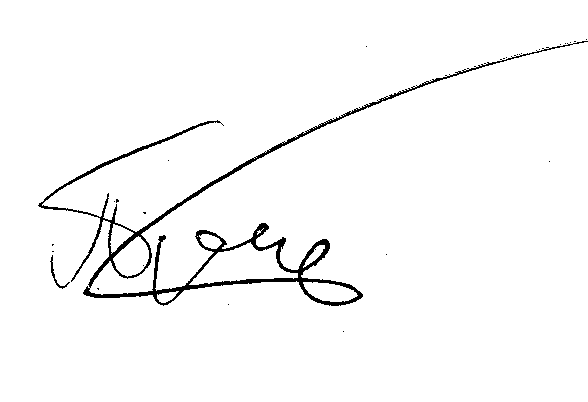

TEST IMAGE:  personB


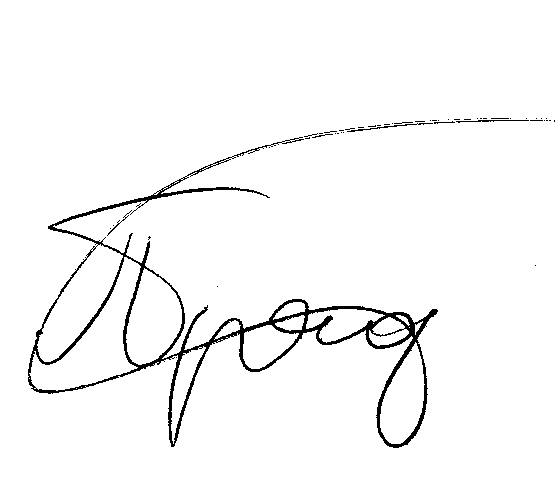

CORRECT MATCH FOR LABELLING:  personB
Hamming Distance:  10


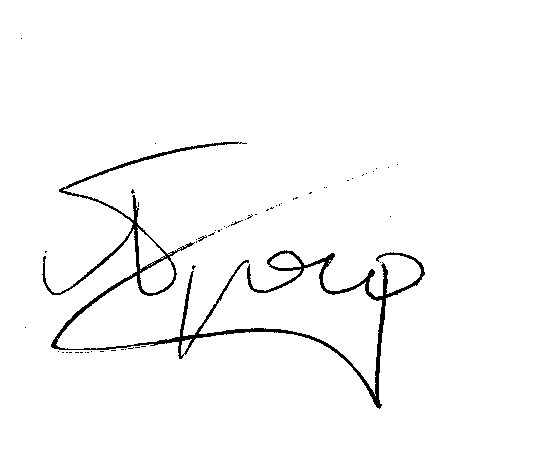

TEST IMAGE:  personB


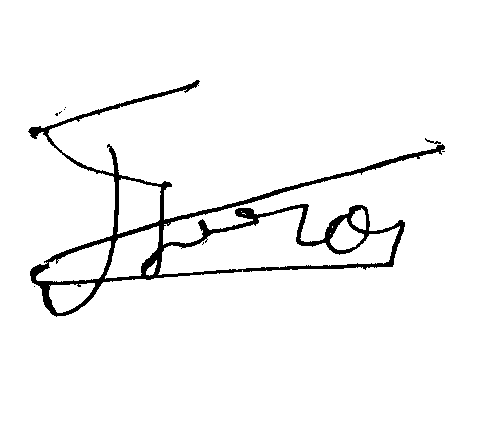

CORRECT MATCH FOR LABELLING:  personB
Hamming Distance:  18


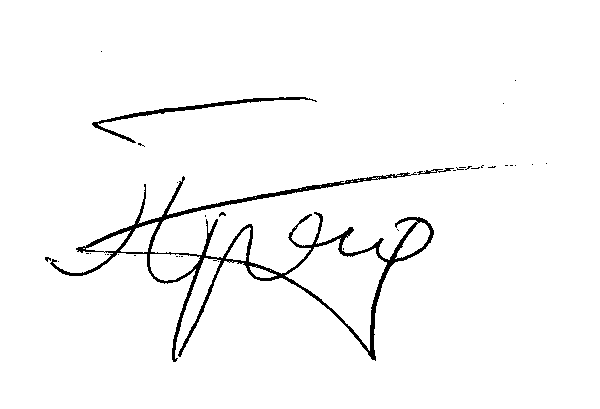

TEST IMAGE:  personB


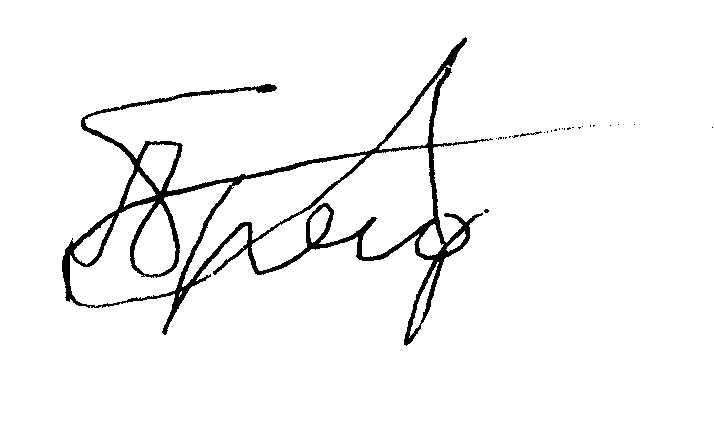

CORRECT MATCH FOR LABELLING:  personB
Hamming Distance:  16


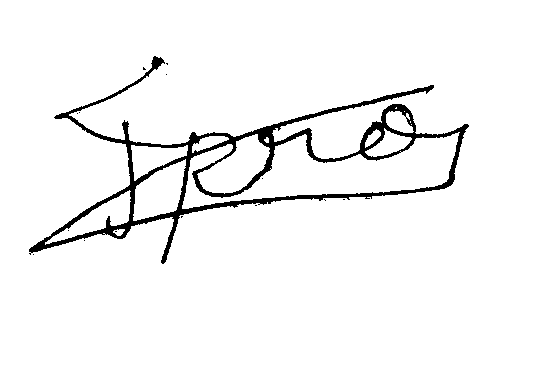

TEST IMAGE:  personB


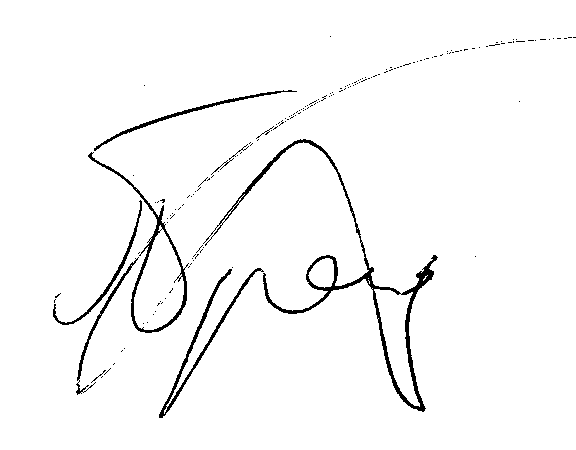

CORRECT MATCH FOR LABELLING:  personB
Hamming Distance:  6


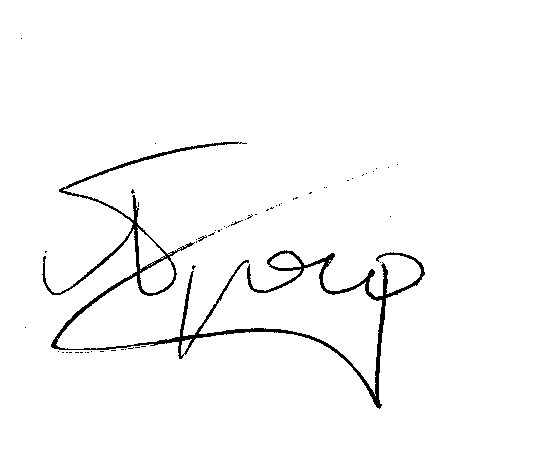

TEST IMAGE:  personB


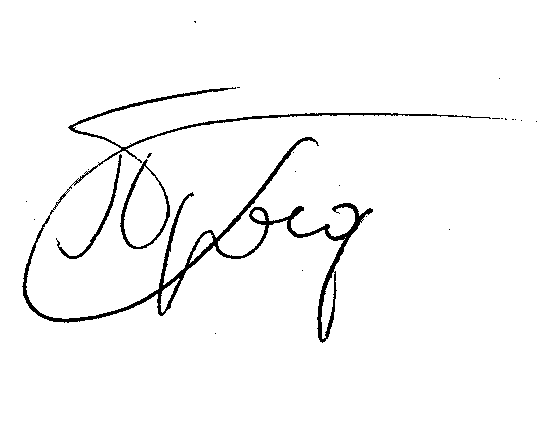

CORRECT MATCH FOR LABELLING:  personB
Hamming Distance:  14


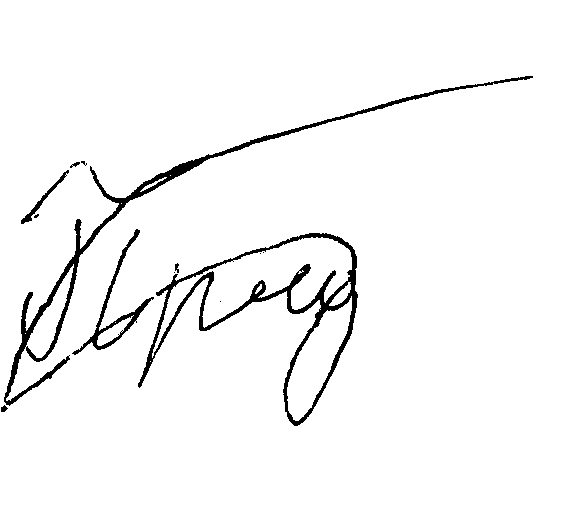

TEST IMAGE:  personB


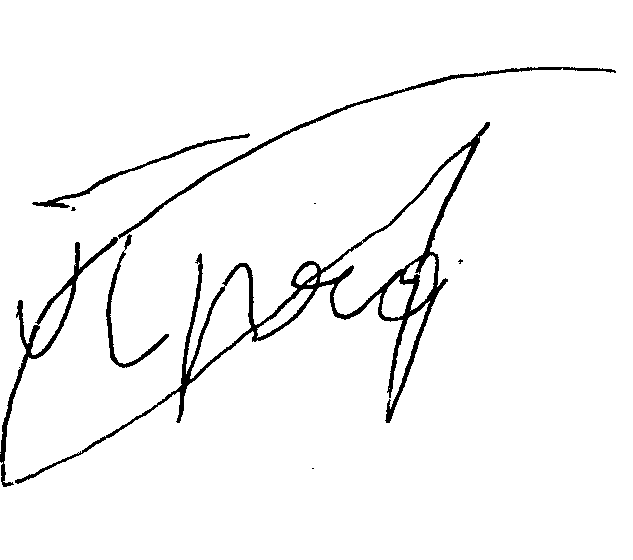

CORRECT MATCH FOR LABELLING:  personB
Hamming Distance:  14


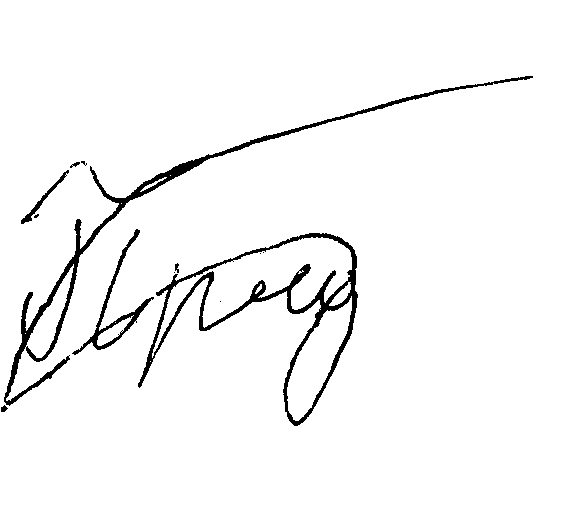

TEST IMAGE:  personB


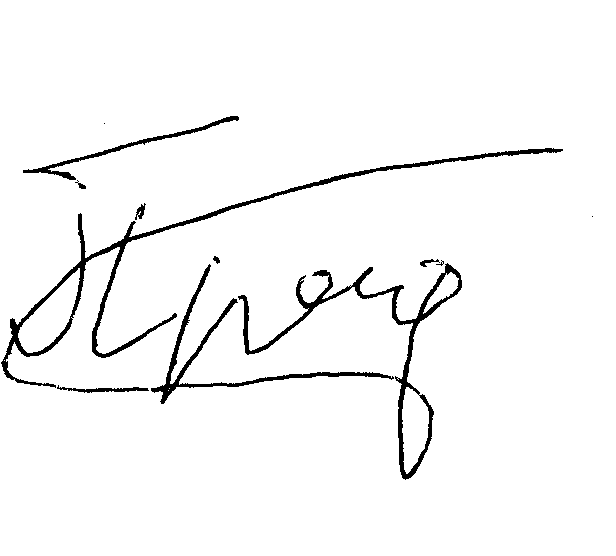

CORRECT MATCH FOR LABELLING:  personB
Hamming Distance:  16


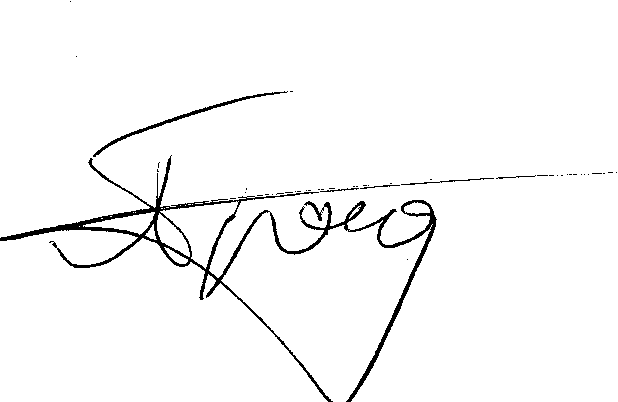

TEST IMAGE:  personC


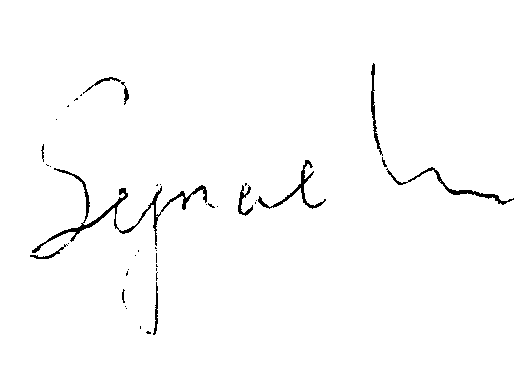

CORRECT MATCH FOR LABELLING:  personC
Hamming Distance:  12


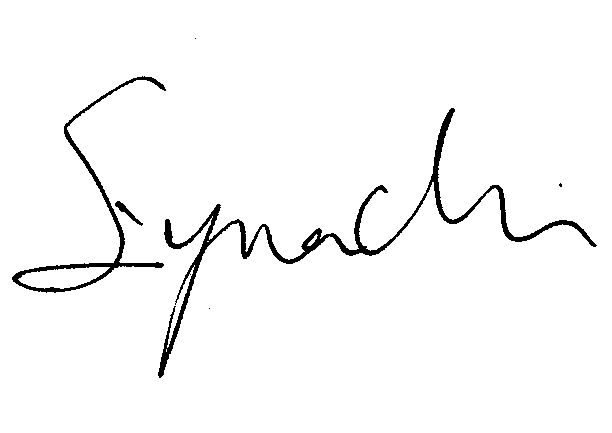

TEST IMAGE:  personC


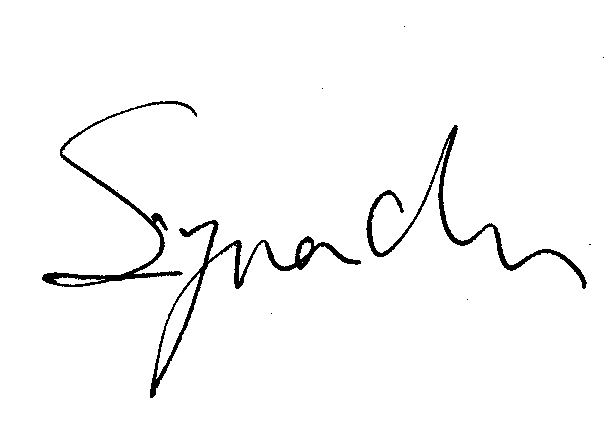

CORRECT MATCH FOR LABELLING:  personC
Hamming Distance:  8


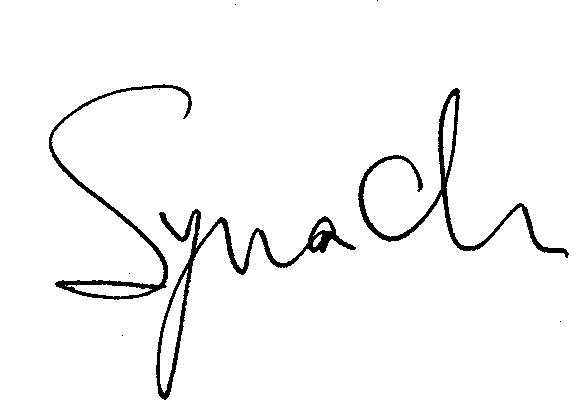

TEST IMAGE:  personC


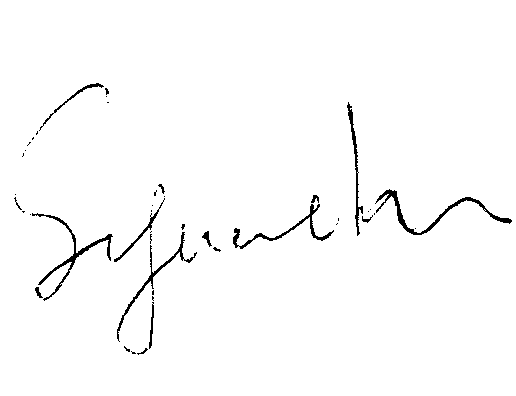

CORRECT MATCH FOR LABELLING:  personC
Hamming Distance:  8


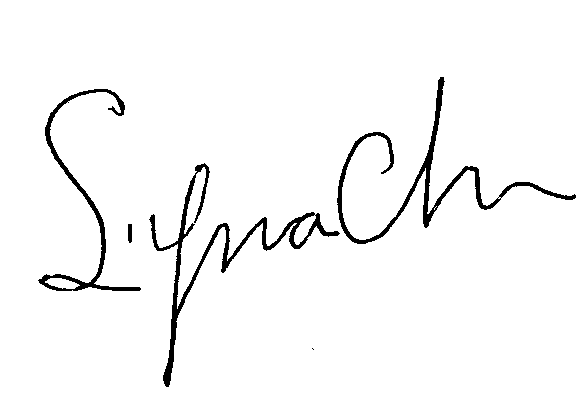

TEST IMAGE:  personC


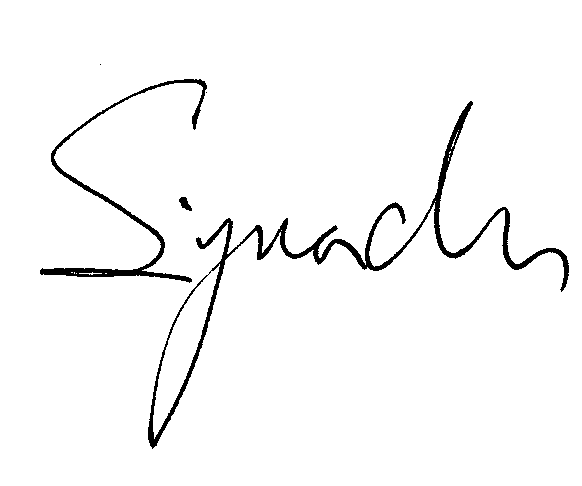

CORRECT MATCH FOR LABELLING:  personC
Hamming Distance:  8


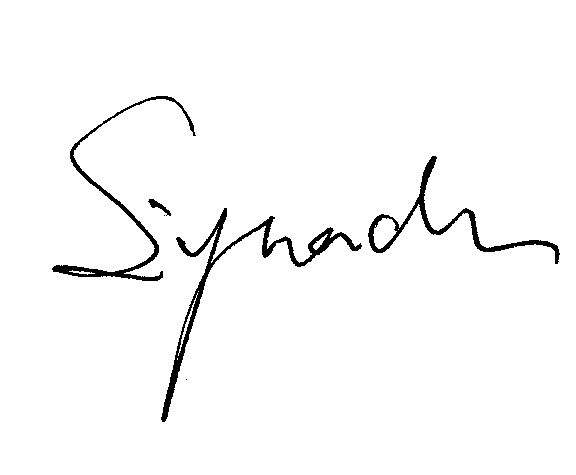

TEST IMAGE:  personC


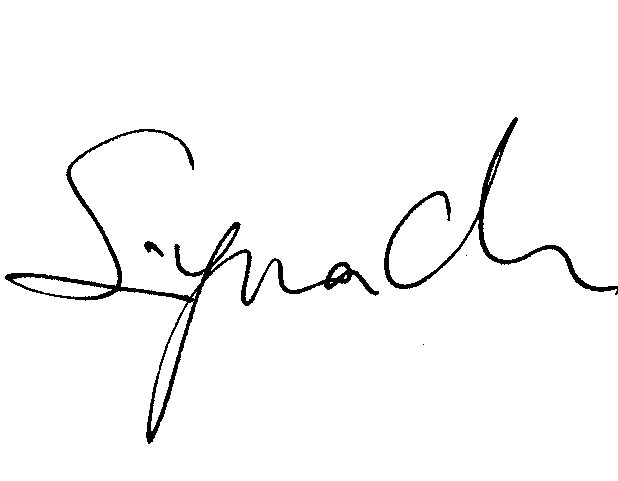

CORRECT MATCH FOR LABELLING:  personC
Hamming Distance:  6


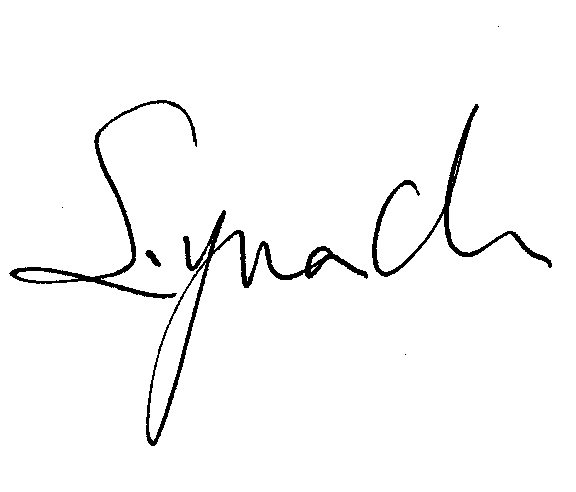

TEST IMAGE:  personC


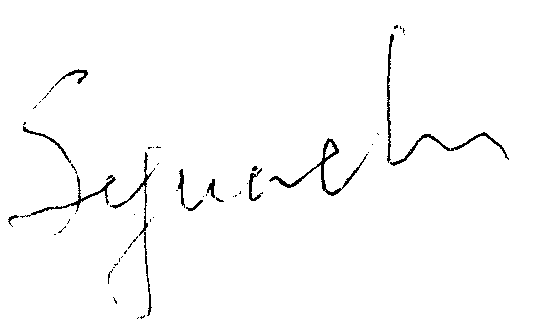

CORRECT MATCH FOR LABELLING:  personC
Hamming Distance:  10


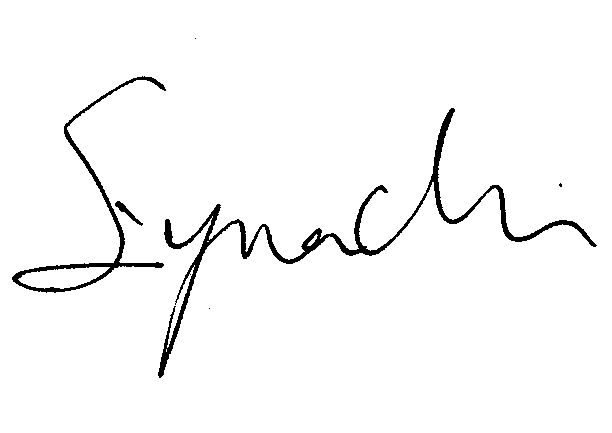

TEST IMAGE:  personC


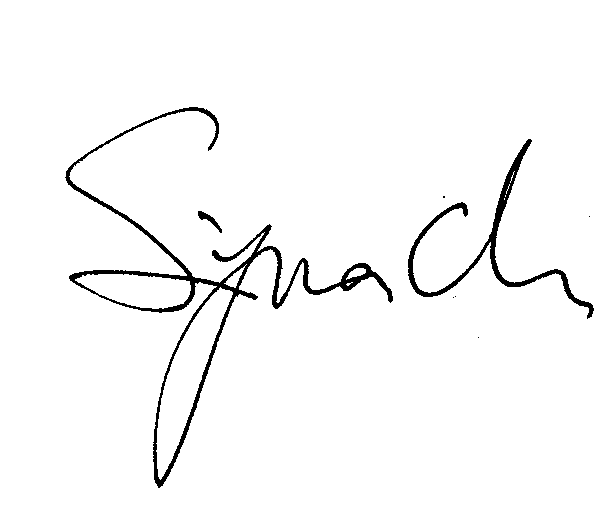

CORRECT MATCH FOR LABELLING:  personC
Hamming Distance:  8


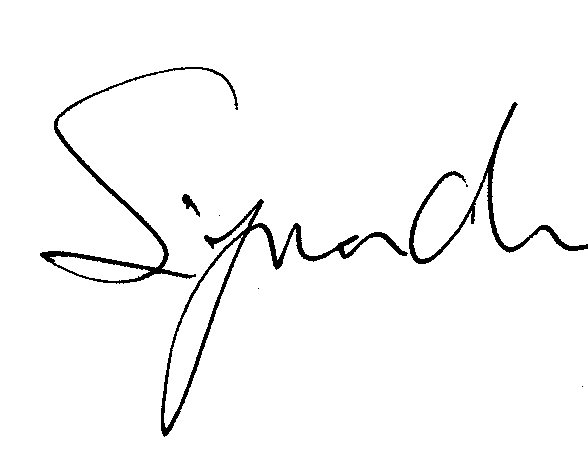

TEST IMAGE:  personD


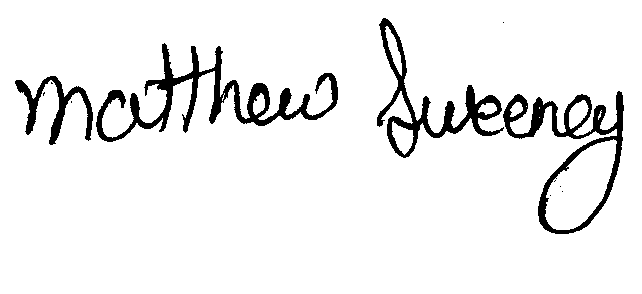

CORRECT MATCH FOR LABELLING:  personD
Hamming Distance:  10


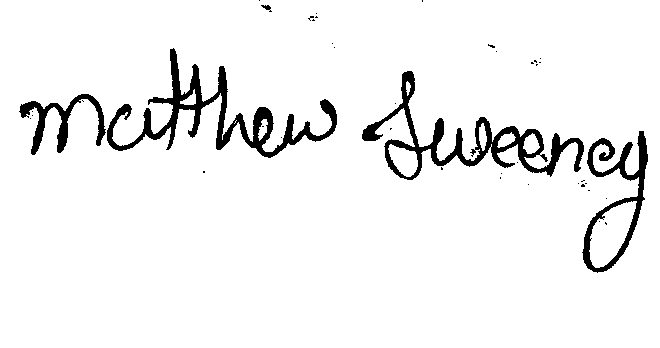

TEST IMAGE:  personD


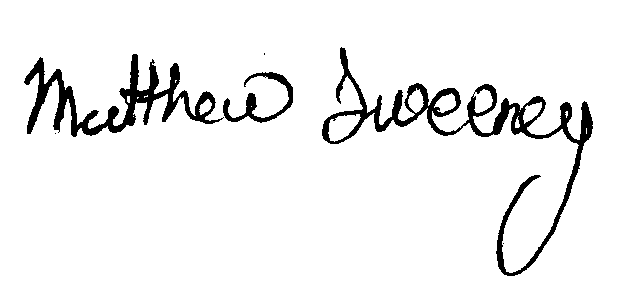

CORRECT MATCH FOR LABELLING:  personD
Hamming Distance:  12


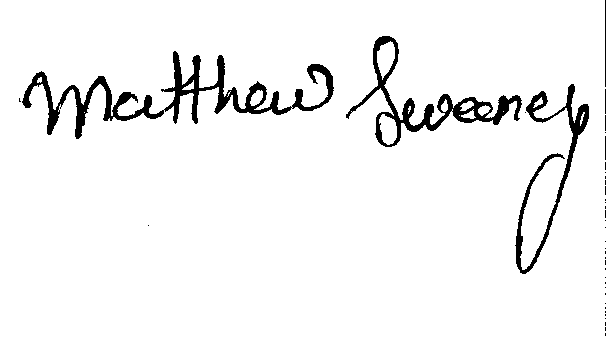

TEST IMAGE:  personD


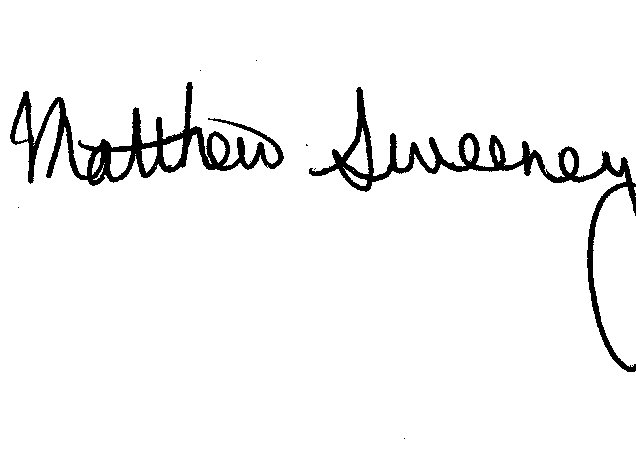

CORRECT MATCH FOR LABELLING:  personD
Hamming Distance:  8


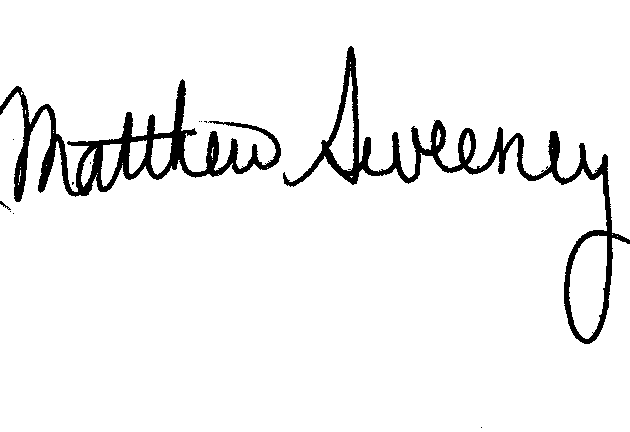

TEST IMAGE:  personD


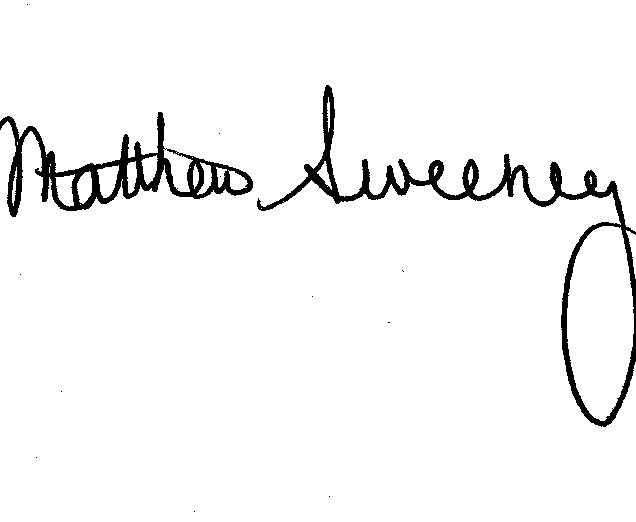

CORRECT MATCH FOR LABELLING:  personD
Hamming Distance:  14


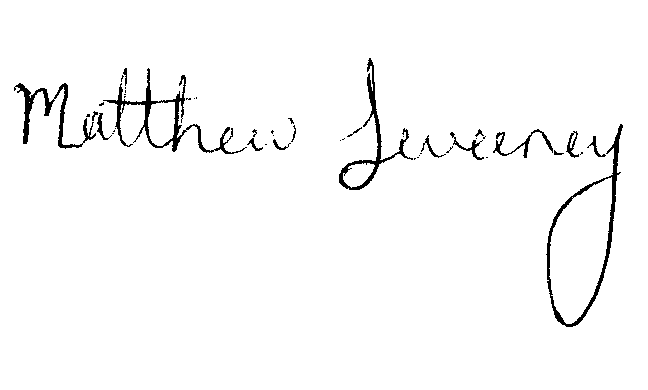

TEST IMAGE:  personD


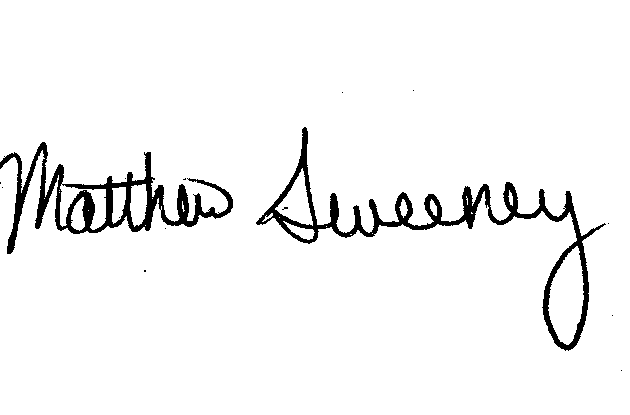

CORRECT MATCH FOR LABELLING:  personD
Hamming Distance:  10


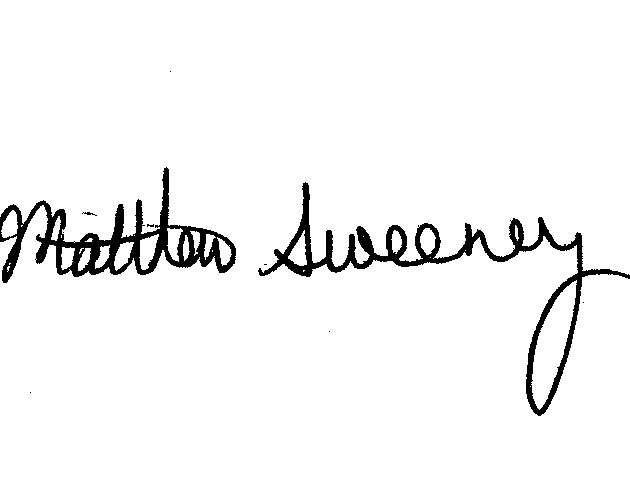

TEST IMAGE:  personD


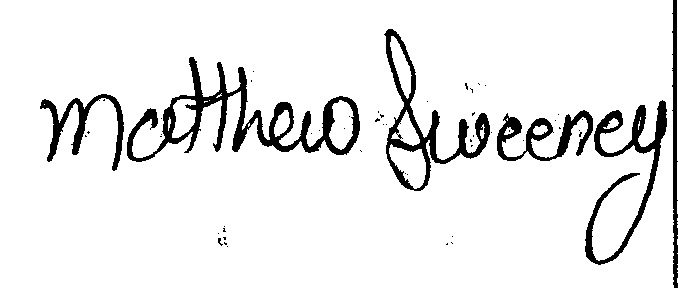

CORRECT MATCH FOR LABELLING:  personD
Hamming Distance:  14


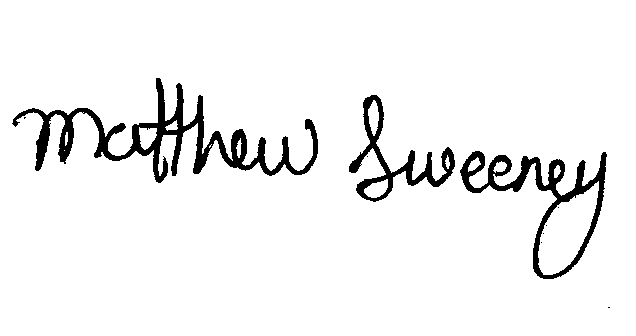

TEST IMAGE:  personD


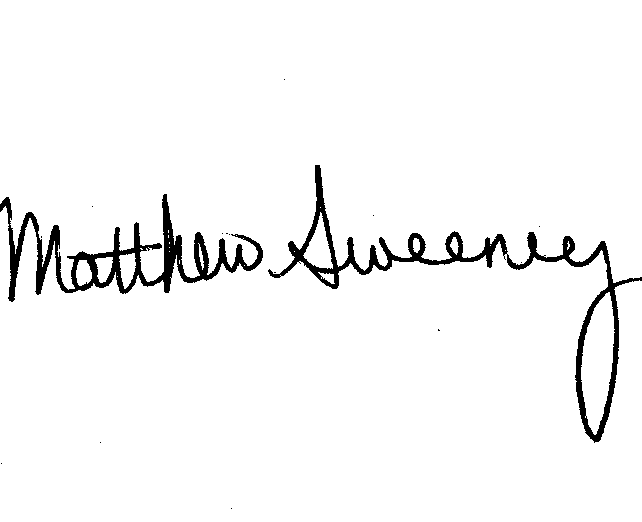

CORRECT MATCH FOR LABELLING:  personD
Hamming Distance:  6


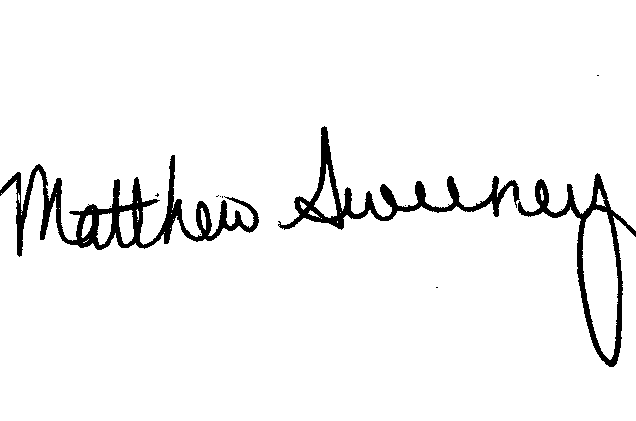

TEST IMAGE:  personD


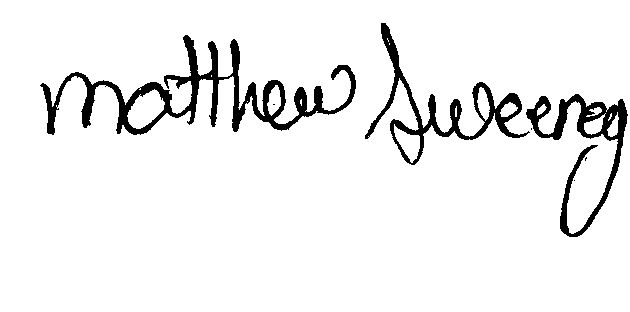

CORRECT MATCH FOR LABELLING:  personD
Hamming Distance:  14


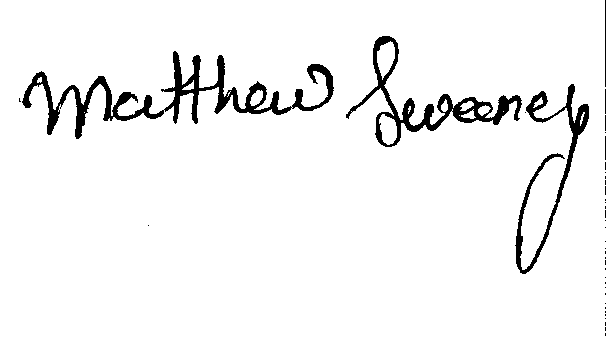

TEST IMAGE:  personE


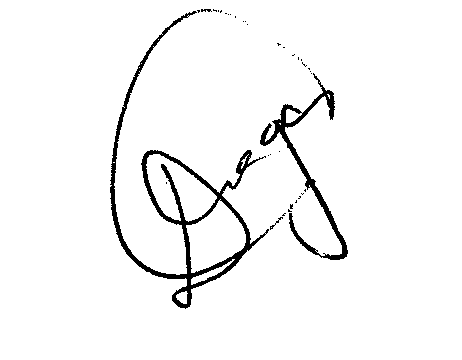

CORRECT MATCH FOR LABELLING:  personE
Hamming Distance:  10


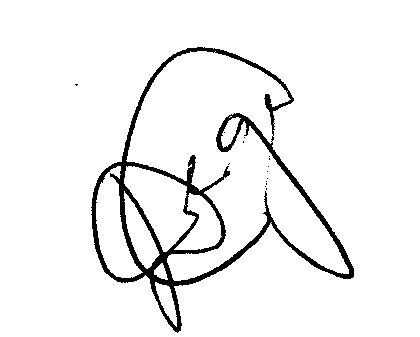

TEST IMAGE:  personE


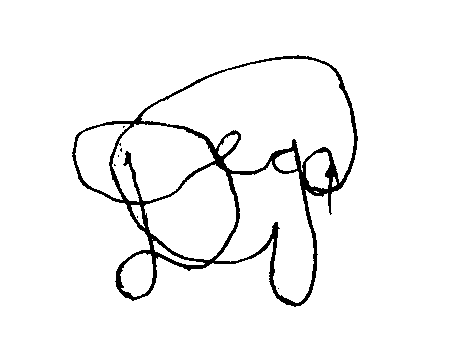

CORRECT MATCH FOR LABELLING:  personE
Hamming Distance:  12


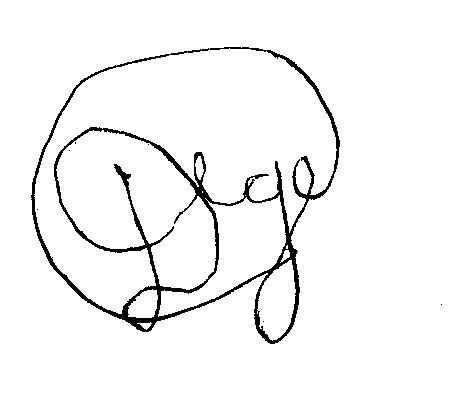

TEST IMAGE:  personE


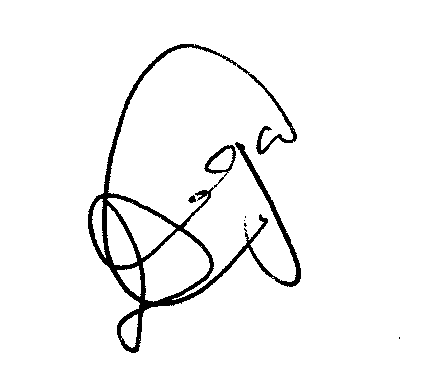

CORRECT MATCH FOR LABELLING:  personE
Hamming Distance:  10


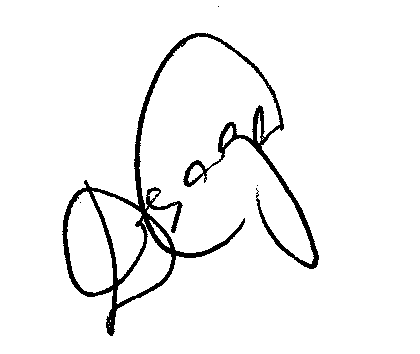

TEST IMAGE:  personE


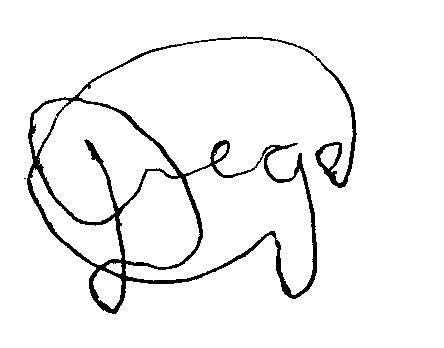

CORRECT MATCH FOR LABELLING:  personE
Hamming Distance:  12


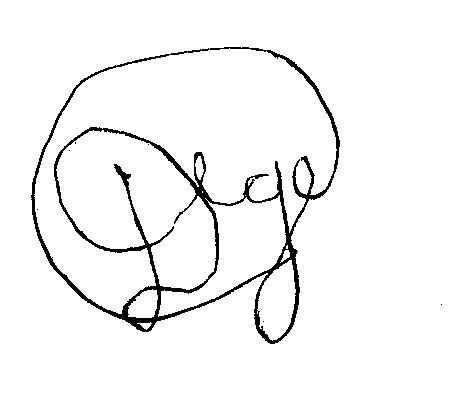

TEST IMAGE:  personE


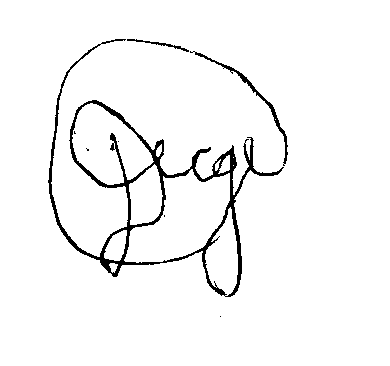

CORRECT MATCH FOR LABELLING:  personE
Hamming Distance:  12


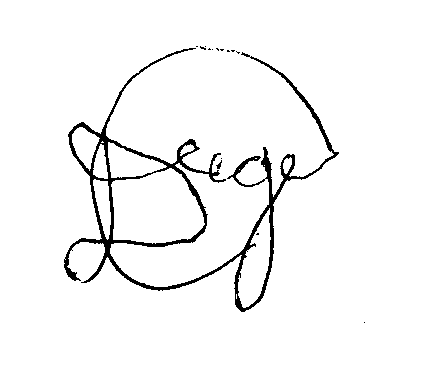

TEST IMAGE:  personE


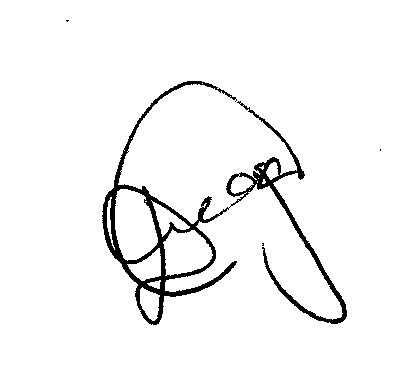

CORRECT MATCH FOR LABELLING:  personE
Hamming Distance:  14


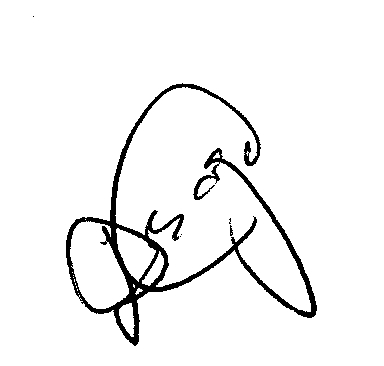

TEST IMAGE:  personE


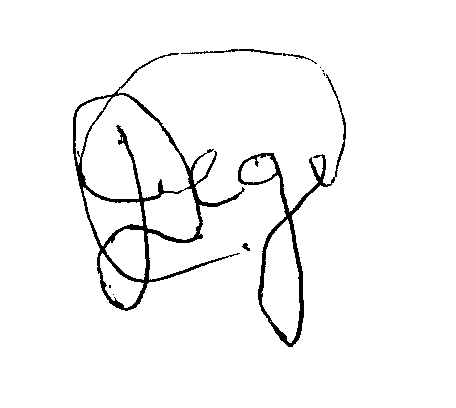

CORRECT MATCH FOR LABELLING:  personE
Hamming Distance:  10


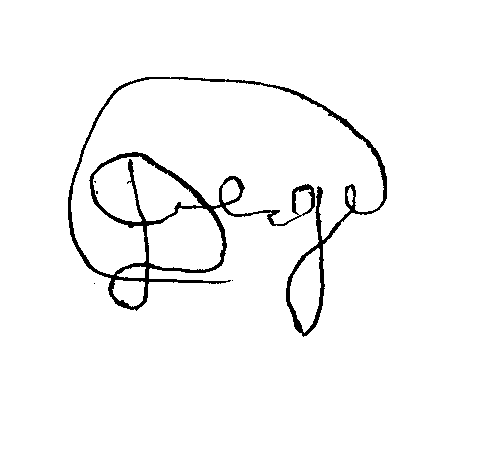

In [5]:
# display all correct cases
for idx, img in enumerate(test_images):
    targ_hash = test_hashes[idx]
    hamm_dist = [targ_hash - cand_hash for cand_hash in train_hashes]

    # print(hamm_dist)
    pred_label = train_labels[np.argmin(hamm_dist)]
    true_label = test_labels[idx]

    if true_label == pred_label:

        print('TEST IMAGE: ', true_label)
        display(test_images[idx])
        print('CORRECT MATCH FOR LABELLING: ', pred_label)
        print('Hamming Distance: ', np.min(hamm_dist))
        display(train_images[np.argmin(hamm_dist)])
        print('===========================================================')

TEST IMAGE:  personC


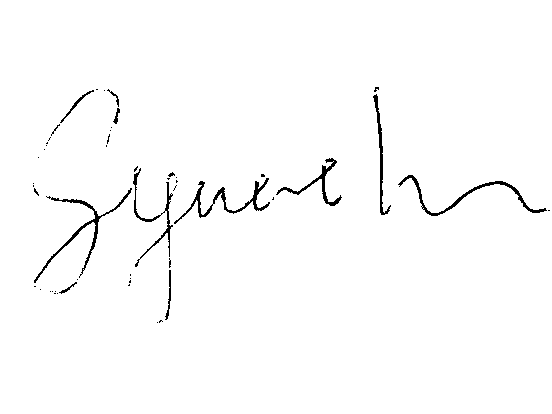

ERRONEOUS MATCH FOR LABELLING:  personB
Hamming Distance:  10


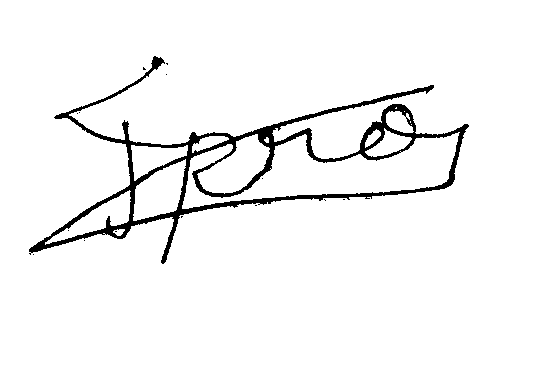

TEST IMAGE:  personE


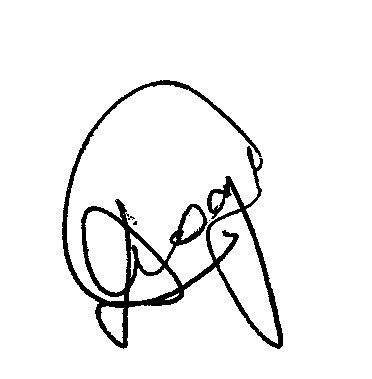

ERRONEOUS MATCH FOR LABELLING:  personA
Hamming Distance:  18


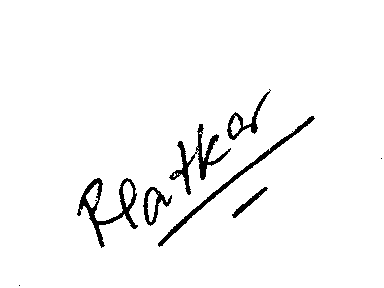

In [6]:
# display all error cases
for idx, img in enumerate(test_images):
    targ_hash = test_hashes[idx]
    hamm_dist = [targ_hash - cand_hash for cand_hash in train_hashes]

    pred_label = train_labels[np.argmin(hamm_dist)]
    true_label = test_labels[idx]

    if true_label != pred_label:
        print('TEST IMAGE: ', true_label)
        display(test_images[idx])
        print('ERRONEOUS MATCH FOR LABELLING: ', pred_label)
        print('Hamming Distance: ', np.min(hamm_dist))
        display(train_images[np.argmin(hamm_dist)])
        print('===========================================================')